Clustering involves grouping of similar objects into a set known as cluster. Kmeans algorithm is an iterative algorithm that tries to partition the dataset into **'k'** pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

We can use elbow method to find the suitable value of cluster **'k'** in data. The **'Sum of Squares for Error (SSE)'** value decreases as the number of cluster increases. After certain number of clusters, the **SSE** value do not change much. Thus, using elbow method, we are trying to find the optimum number of cluster value **'k'** after which the **SSE** do not show much alteration.

 ![](https://docs.google.com/uc?export=download&id=1R_ipSavwL7dI498kr9WOW_BZl_ma_XDz)

Here, m is the total data points, x is the data and $\mu_{k}$ is the mean.

**For example:**

If the initial data points are the numbers from 1 to 20.


In [0]:
import numpy as np

In [46]:
numbers = np.arange(1, 21, 1)
numbers

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

Our centroid is 10.5 **(k=1)**

In [47]:
initial_centroid = np.average(numbers)
initial_centroid

10.5

The difference between each number and it's centroid is:

In [48]:
d1 = np.absolute(numbers-initial_centroid)
d1

array([9.5, 8.5, 7.5, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5, 0.5, 1.5, 2.5,
       3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

The **'Sum of Squares for Error (SSE)'** is:

In [49]:
all_SSE = []
distortion_values = []
total = len(numbers)
squared_d1 = np.square(d1)
SSE = np.sum(squared_d1)/total
all_SSE.append(SSE)
distortion_values.append(np.sum(squared_d1))
SSE

33.25

When **k=2**:

In [50]:
mid = len(numbers)/2
first_avg = np.average(numbers[0:int(mid)])
second_avg = np.average(numbers[int(mid):len(numbers)])

n1 = np.absolute(numbers[0:int(mid)]-first_avg) 
n2 = np.absolute(numbers[int(mid):len(numbers)]-second_avg)
d2 = np.concatenate((n1, n2), axis=0)

# the 'Sum of Squares for Error (SSE)' is:
squared_d2 = np.square(d2)
SSE = np.sum(squared_d2)/total
all_SSE.append(SSE)
distortion_values.append(np.sum(squared_d2))
SSE

8.25

When **k = 3**, 

In [51]:
mid = len(numbers)/3
first_avg = np.average(numbers[0:int(mid)])
second_avg = np.average(numbers[int(mid):2*int(mid)])
third_avg = np.average(numbers[2*int(mid):len(numbers)])

n1 = np.absolute(numbers[0:int(mid)]-first_avg) 
n2 = np.absolute(numbers[int(mid):2*int(mid)]-second_avg)
n3 = np.absolute(numbers[2*int(mid):len(numbers)]-third_avg)

d3 = np.concatenate((n1, n2, n3), axis=0)

# the 'Sum of Squares for Error (SSE)' is:
squared_d3 = np.square(d3)
SSE = np.sum(squared_d3)/total
all_SSE.append(SSE)
distortion_values.append(np.sum(squared_d3))
SSE

3.85

When **k=4,**

In [52]:
mid = len(numbers)/4
first_avg = np.average(numbers[0:int(mid)])
second_avg = np.average(numbers[int(mid):2*int(mid)])
third_avg = np.average(numbers[2*int(mid):3*int(mid)])
fourth_avg = np.average(numbers[3*int(mid):4*int(mid)])
fifth_avg = np.average(numbers[4*int(mid):5*int(mid)])

n1 = np.absolute(numbers[0:int(mid)]-first_avg) 
n2 = np.absolute(numbers[int(mid):2*int(mid)]-second_avg)
n3 = np.absolute(numbers[2*int(mid):3*int(mid)]-third_avg)
n4 = np.absolute(numbers[3*int(mid):4*int(mid)]-fourth_avg)
n5 = np.absolute(numbers[4*int(mid):5*int(mid)]-fifth_avg)

d4 = np.concatenate((n1, n2, n3, n4, n5), axis=0)

# the 'Sum of Squares for Error (SSE)' is:
squared_d4 = np.square(d4)
SSE = np.sum(squared_d4)/total
all_SSE.append(SSE)
distortion_values.append(np.sum(squared_d4))
SSE

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2.0

In [53]:
all_SSE

[33.25, 8.25, 3.85, 2.0]

Thus, **SSE** decreases as the number of clusters **k** increases. The **distortion value** (sum of difference of distance between each point and centroid)  which is an unnormalized SSE also decreases as the number of clusters **k** increases. After some point, the value of distortion is constant. So, this value can be used to determine the optimal number of clusters in k-means after which the euclidean distance between each point and centroid do not change.

In [54]:
distortion_values

[665.0, 165.0, 77.0, 40.0]

**Using elbow method to determine the number of clusters in k-means**

In [55]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Here, 3 is the minimum number of clusters after which the change in cluster size do not alter SSE drastically. Using k=3 as the cluster size in the above data.

In [56]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
y_kmeans = kmeans.predict(X)

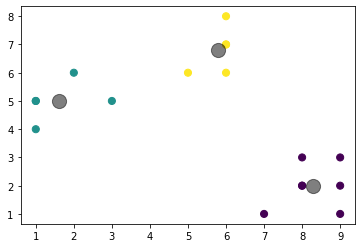

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);